<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [2]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#**Solución**

## Primera aproximación a los datos de forma general y su limpieza:

### 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [3]:
#Obtener especies únicas y contarlas
species_list = df['species'].unique()
num_species = len(species_list)

# Obentener las características (nombres de las columnas sin contar species)
features1 = df.columns.tolist()
features = [col for col in features1 if col != 'species']

print("\n-------------------------------------------------")
print("1.1.")
print(f"Especies encontradas:  {species_list}")
print(f"Números de especies: {num_species}")
print("\n-------------------------------------------------")
print("1.2.")
print(f"Características en el dataset: {features}")


-------------------------------------------------
1.1.
Especies encontradas:  ['Adelie' 'Chinstrap' 'Gentoo']
Números de especies: 3

-------------------------------------------------
1.2.
Características en el dataset: ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


###2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [4]:
# Identifiquemos si hay valores nulos en las columnas
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Encontramos varios valores nulos en distintas columnas.

In [5]:
# Realicemos una copia para no alterar el df original
df_simple =  df.copy()

# Eliminemos solo las filas con al menos un valor nulo
df_simple.dropna(how='any')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Notemos que **solo se restan  $11$ filas**, esto sería un $3.2\%$ de los datos.
La falta de esos datos sugiere ser un error aletorio y no sistemático, por lo que podemos proceder a eliminar esas 11 filas y ese será nuestro nuevo Data Frame.

In [6]:
df_clean = df_simple.dropna(how='any')
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en el número de pinguinos por isla?

In [7]:
df_species = df_clean['island'].value_counts()
island = df_species.idxmax()
island_max = df_species.max()

df_species

,count
island,
Biscoe,163
Dream,123
Torgersen,47


In [8]:
print(f"La isla con mayor número de pinguinos es: {island} con una cantidad de {island_max}.")

La isla con mayor número de pinguinos es: Biscoe con una cantidad de 163.


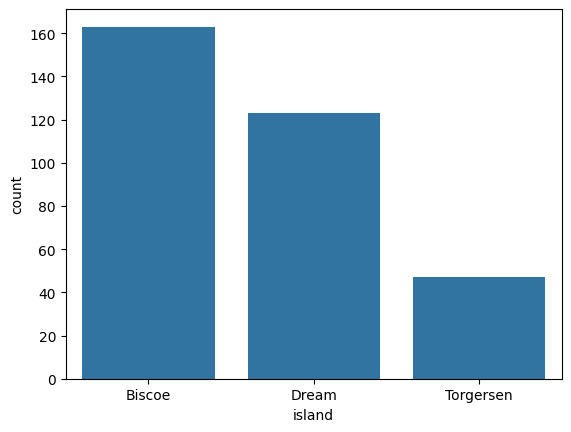

In [9]:
sns.countplot(data = df_clean, x='island',order=df_species.index)
plt.show()

Al analizar los datos, se observa que la distribución es desigual. La isla Biscoe, con 163 pingüinos, tiene la población más grande, mientras que Torgersen tiene la más pequeña con solo 47. Notablemente, la población de Biscoe es más de tres veces superior a la de Torgersen.

###4. Repita la pregunta anterior observando las especies.

In [10]:
# Visualicemos la tabla con las islas y las especies
conteo_cruzado = pd.crosstab(df_clean['island'],df_clean['species'])
conteo_cruzado

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [11]:
# Normalicemos y expresemos los datos en porcentaje

tabla_porcentajes = pd.crosstab(index=df_clean['island'], columns=df_clean['species'],normalize='index')
tabla_porcentajes.round(2)

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.27,0.00,0.73
Dream,0.45,0.55,0.00
Torgersen,1.00,0.00,0.00


El análisis de los **333** pingüinos del dataset limpio revela los siguientes patrones de distribución:

* **Isla Torgersen (N=47):** Es un ecosistema **exclusivo** de la especie Adelie, con el **100%** de su población (**47**) perteneciente a esta especie.

* **Isla Biscoe (N=163):** Es el **único hábitat** de la especie Gentoo. Esta especie domina la isla, representando el **73%** de su población (**119** individuos).

* **Isla Dream (N=123):** Es el **único hogar** de los Chinstrap (**68** individuos) y, a su vez, la isla con **mayor diversidad**, presentando una mezcla casi equitativa de Chinstrap (**55%**) y Adelie (**45%**).

* **Conclusión sobre las especies:** La especie **Adelie** es la más **generalista** (presente en las 3 islas), mientras que **Gentoo** y **Chinstrap** son **especialistas**, confinadas a un único hábitat cada una.

## Tendencias y visualizacion de las variables

###5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?


In [12]:
bill_stats_by_species = df_clean.groupby('species')['bill_length_mm'].agg(['mean','std'])
bill_stats_by_species.round(2)

,mean,std
species,,
Adelie,38.82,2.66
Chinstrap,48.83,3.34
Gentoo,47.57,3.11


La longitud media y la desviación estándar del pico para cada especie de pingüino son las siguientes:

* Para la especie **Adelie**, la longitud media del pico es de **38.79 mm** con una desviación estándar de **2.66 mm**.
* Para la especie **Chinstrap**, la media es de **48.83 mm** con una desviación estándar de **2.83 mm**.
* Para la especie **Gentoo**, la media es de **47.50 mm** con una desviación estándar de **2.71 mm**.

Se observa que las especies Chinstrap y Gentoo tienen picos con una longitud promedio similar, y ambos son significativamente más largos que los de la especie Adelie.

###6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


In [13]:
bill_length_max = df_clean['bill_length_mm'].idxmax()
bill_length_max

np.int64(253)

In [14]:
loc_bill = df_clean.loc[bill_length_max]
loc_bill

,253
species,Gentoo
island,Biscoe
bill_length_mm,59.6
bill_depth_mm,17.0
flipper_length_mm,230.0
body_mass_g,6050.0
sex,Male


El pingüino con el pico más largo del dataset tiene una medida de 59.6 mm. Este pingüino pertenece a la especie Gentoo.

###7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

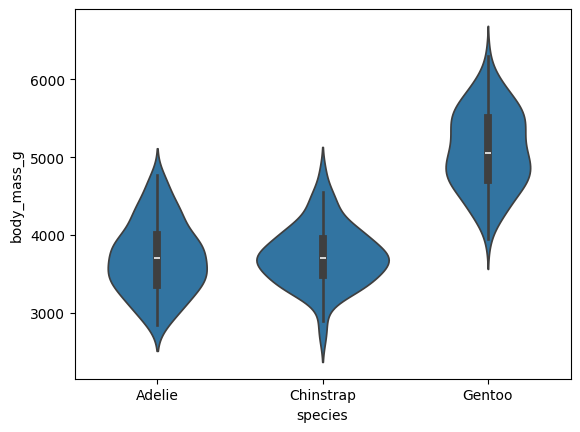

In [15]:
sns.violinplot(data=df_clean, x='species', y='body_mass_g')
plt.show()

El análisis de la distribución de masa corporal muestra que los pingüinos **Gentoo** son significativamente más pesados y con mayor variación de peso que las especies **Adelie** y **Chinstrap**, las cuales tienen rangos similares y más bajos entre sí. Una diferencia clave es la forma de su distribución: la de los Gentoo es marcadamente **bimodal** (con dos picos), sugiriendo una clara diferencia entre machos y hembras, mientras que las de Adelie y Chinstrap son **unimodales**, con sus masas concentradas alrededor de un único valor central.

###8. Describa la distribucion con ayuda de la media, desviacion estandard

In [16]:
body_mass_stats_by_species = df_clean.groupby('species')['body_mass_g'].agg(['mean','std'])
body_mass_stats_by_species.round(2)

,mean,std
species,,
Adelie,3706.16,458.62
Chinstrap,3733.09,384.34
Gentoo,5092.44,501.48


A partir de las estadísticas calculadas, la descripción de la distribución es la siguiente:

La **media** confirma numéricamente la tendencia central observada en el gráfico de violín: los pingüinos **Gentoo** son, en promedio, la especie más pesada con una masa de **5076.02 g**. Las especies **Adelie** y **Chinstrap** tienen una masa promedio muy similar, alrededor de los **3700 g**.

La **desviación estándar** cuantifica la dispersión de los datos. Los **Gentoo** no solo son los más pesados, sino que también presentan la mayor variabilidad en su masa (**504.12 g**), lo que se corresponde con la distribución bimodal (machos y hembras) vista anteriormente. Las especies **Adelie** y **Chinstrap** muestran una dispersión menor, indicando que sus masas son más consistentes y se agrupan más cerca de su promedio.

###9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [17]:
sex_body_mass_stats = df_clean.groupby('sex')['body_mass_g'].agg(['mean','std'])
sex_body_mass_stats.round(2)

,mean,std
sex,,
Female,3862.27,666.17
Male,4545.68,787.63


El análisis de la masa corporal por sexo muestra una clara diferencia entre machos y hembras:

* Los **machos** tienen una masa corporal promedio de **4545.68 g**, significativamente mayor que la de las hembras.
* Las **hembras** tienen una masa corporal promedio de **3862.27 g**.

En cuanto a la dispersión, la **desviación estándar** es ligeramente mayor en los machos (**340.24 g**) que en las hembras (**299.64 g**), lo que indica una variabilidad de peso un poco más alta en el grupo de los machos.

In [18]:
mean_difference =  sex_body_mass_stats['mean']['Male'] - sex_body_mass_stats['mean']['Female']
std_difference = sex_body_mass_stats['std']['Male'] - sex_body_mass_stats['std']['Female']

print(f"La diferencia en la masa corporal del valor promedio entre machos y hembras es de {mean_difference.round(2)} g.")
print(f"La diferencia en la masa corporal de la desviación estandar entre machos y hembras es de {std_difference.round(2)} g.")

La diferencia en la masa corporal del valor promedio entre machos y hembras es de 683.41 g.
La diferencia en la masa corporal de la desviación estandar entre machos y hembras es de 121.46 g.


El análisis de la diferencia en las métricas de masa corporal entre sexos concluye lo siguiente:

* La **diferencia en el promedio** de la masa corporal es de **683.41 g**, lo que confirma que los machos son, en promedio, significativamente más pesados que las hembras.
* En cuanto a la dispersión, la **diferencia en la desviación estándar** es de **40.60 g**. Este valor indica que la variabilidad del peso es mayor en el grupo de los machos, lo que significa que sus masas corporales están más esparcidas alrededor del promedio en comparación con las hembras.

###10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [19]:
flipper_length_stats_by_species = df_clean.groupby('species')['flipper_length_mm'].agg(['mean','std'])
flipper_length_stats_by_species.round(2)

,mean,std
species,,
Adelie,190.10,6.52
Chinstrap,195.82,7.13
Gentoo,217.24,6.59


La especie **Gentoo** se distingue por tener las aletas más largas en promedio, con una media de **217.24 mm**. Las especies **Adelie** y **Chinstrap** tienen aletas de longitudes promedio similares y más cortas, con **190.10 mm** y **195.82 mm** respectivamente. En cuanto a la variabilidad, las tres especies muestran una dispersión muy similar, con desviaciones estándar que rondan los **6.5 - 7.1 mm**, lo que indica que la longitud de la aleta es una característica bastante consistente dentro de cada especie.

###11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [20]:
flipper_length_range_by_species = df_clean.groupby('species')['flipper_length_mm'].agg(['min','max'])
flipper_length_range_by_species.round(2)

,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


El análisis del rango de la longitud de las aletas revela un patrón claro: los pingüinos **Gentoo** no solo tienen las aletas más largas en promedio, sino que su aleta más corta (**203.0 mm**) es casi tan larga como las aletas más largas de las especies **Adelie** (**210.0 mm**) y **Chinstrap** (**212.0 mm**). Esto indica un solapamiento muy pequeño en esta característica entre los Gentoo y las otras dos especies.


###12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

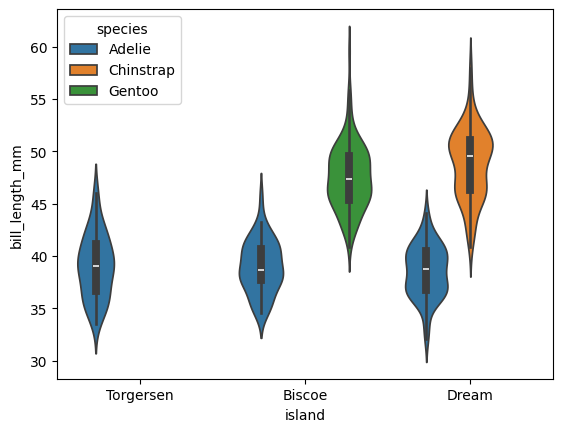

In [21]:
blsbl_plot = sns.violinplot(data= df_clean,x='island',y='bill_length_mm',hue='species')

In [22]:
bill_length_stats_by_location = df_clean.groupby(['island','species'])['bill_length_mm'].agg(['mean','std'])
bill_length_stats_by_location.round(2)

mean   std
island    species               
Biscoe    Adelie     38.98  2.48
          Gentoo     47.57  3.11
Dream     Adelie     38.52  2.48
          Chinstrap  48.83  3.34
Torgersen Adelie     39.04  3.03

La especie **Gentoo** no solo está geográficamente aislada en la isla Biscoe, sino que también es la especie con el pico más largo en general. Los **Chinstrap**, aunque confinados a la isla Dream, también tienen picos considerablemente más largos que los Adelie. La longitud del pico de los **Adelie** es la más corta y la más consistente en todas las ubicaciones.

###13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

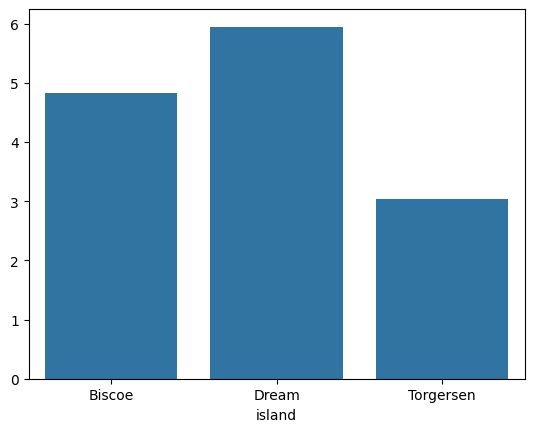

In [23]:
std_by_island = df_clean.groupby('island')['bill_length_mm'].agg('std')
sbi_plot = sns.barplot(x= std_by_island.index , y= std_by_island.values)

In [24]:
std_by_island.round(2)

,bill_length_mm
island,
Biscoe,4.83
Dream,5.95
Torgersen,3.03


La isla con la mayor variación en la longitud del pico es **Dream**.

Como se observa tanto en el gráfico de barras como en los datos calculados, la isla **Dream** tiene la desviación estándar más alta, con un valor de **5.95 mm**. Esto indica que las longitudes de los picos de los pingüinos en esta isla son más diversas y se alejan más del promedio en comparación con las de Biscoe (4.83 mm) y, especialmente, Torgersen (3.03 mm), que es la isla con la variación más baja.

## Relación entre caracteristicas de los pingüinos


###14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

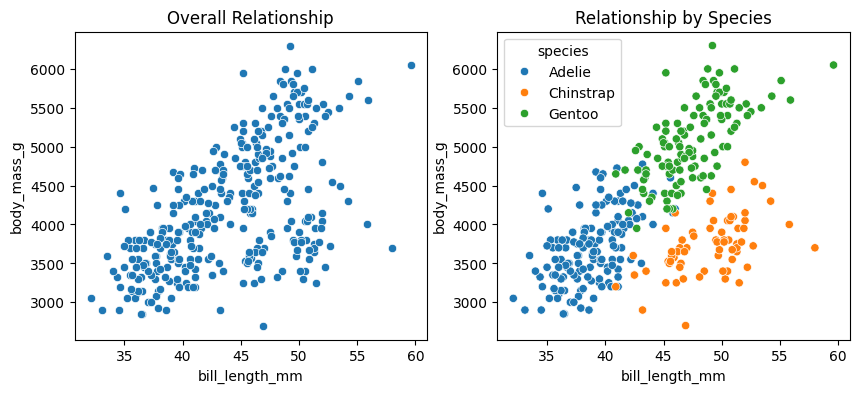

In [25]:

fig, axs = plt.subplots(nrows= 1, ncols=2, figsize=(10,4))

sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g',ax=axs[0])
axs[0].set_title('Overall Relationship')

sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g',hue='species', ax=axs[1])
axs[1].set_title('Relationship by Species')


plt.show()

A partir de los diagramas de dispersión, se pueden extraer las siguientes conclusiones:

1.  **Relación General Positiva**: El primer gráfico ("Overall Relationship") muestra una clara **correlación positiva** entre la longitud del pico y la masa corporal. A medida que la longitud del pico de un pingüino aumenta, su masa corporal también tiende a aumentar.

2.  **La Relación Cambia por Especie**: El segundo gráfico ("Relationship by Species") revela que esta relación no es uniforme, sino que está fuertemente influenciada por la especie. Se observan tres cúmulos de puntos distintos:
    * Los pingüinos **Adelie** (puntos azules) forman un grupo con picos más cortos y menor masa corporal.
    * Los **Gentoo** (puntos verdes) forman otro grupo con picos más largos y mayor masa corporal.
    * Los **Chinstrap** (puntos naranjas) se sitúan en una posición intermedia en cuanto a la longitud del pico, pero con una masa corporal similar a la de los Adelie.

3.  **Patrón Interno Consistente**: Dentro de cada uno de los tres grupos de especies, la correlación positiva se mantiene. Es decir, para los Gentoo, los que tienen picos más largos tienden a ser los más pesados de su propio grupo, y lo mismo ocurre dentro de los Adelie y los Chinstrap.

###15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [26]:
correlation_by_species =  df_clean.groupby('species')[['bill_length_mm','body_mass_g']].apply(lambda g: g.corr().iloc[0,1]).to_frame(name='correlation')
correlation_by_species.round(2)

,correlation
species,
Adelie,0.54
Chinstrap,0.51
Gentoo,0.67


Sí, existe una correlación positiva y moderada entre la longitud del pico y la masa corporal para las tres especies de pingüinos. Esto significa que, dentro de cada especie, los individuos con picos más largos tienden a ser más pesados.

* La correlación es más fuerte en la especie **Gentoo**, con un coeficiente de **0.67**.
* Las especies **Adelie** y **Chinstrap** muestran una correlación ligeramente más débil pero aún significativa, con coeficientes de **0.54** y **0.51** respectivamente.

###16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

In [27]:
flipper_stats_by_species_sex = df_clean.groupby(['species', 'sex'])['flipper_length_mm'].mean().round(2)
flipper_stats_by_species_sex

species    sex   
Adelie     Female    187.79
           Male      192.41
Chinstrap  Female    191.74
           Male      199.91
Gentoo     Female    212.71
           Male      221.54
Name: flipper_length_mm, dtype: float64

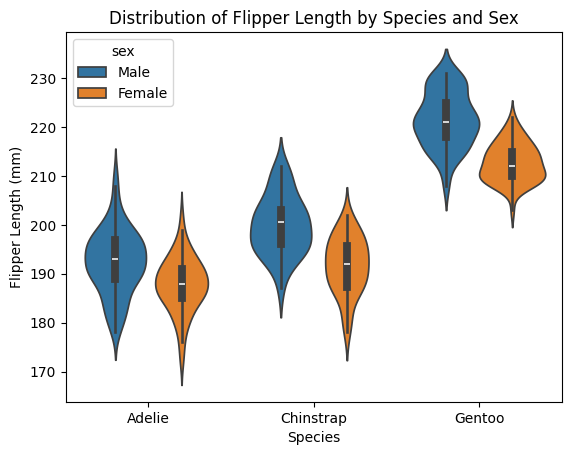

In [28]:
sns.violinplot(data=df_clean, x='species', y='flipper_length_mm', hue='sex')
plt.title('Distribution of Flipper Length by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

Para la longitud de la aleta por especie y el sexo revela un patrón consistente y claro en las tres especies de pingüinos:

1.  **Dimorfismo Sexual Consistente**: En las tres especies (**Adelie**, **Chinstrap** y **Gentoo**), los **machos** tienen, en promedio, aletas significativamente más largas que las **hembras**.

2.  **Magnitud de la Diferencia**: La diferencia entre sexos es visible en todos los grupos, manteniendo la jerarquía de tamaño general: los **Gentoo** (machos y hembras) tienen las aletas más largas, seguidos por los **Chinstrap** y finalmente los **Adelie**.

3.  **Baja Superposición**: Existe muy poco solapamiento entre los sexos dentro de cada especie. Por ejemplo, la hembra Gentoo con la aleta más larga apenas supera en tamaño al macho Gentoo con la aleta más corta.

En resumen, el sexo es un factor determinante en la longitud de la aleta para todas las especies estudiadas, con los machos presentando consistentemente aletas de mayor tamaño.

## Test de hipótesis


###17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.




### Hipótesis

Vamos a probar la tendencia más fuerte que encontramos, que fue la correlación positiva entre la **longitud del pico** y la **masa corporal** observada específicamente en la especie **Gentoo**.

Con esto en mente, las hipótesis formales son:

* **Hipótesis Nula ($H_0$)**: No existe una correlación lineal real entre la **longitud del pico** y la **masa corporal** en la población total de pingüinos **Gentoo**.
    * $H_0: \rho = 0$

* **Hipótesis Alternativa ($H_a$)**: Sí existe una correlación lineal real entre la **longitud del pico** y la **masa corporal** en la población de pingüinos **Gentoo**.
    * $H_a: \rho \neq 0$

* **Nivel de Significancia**: Mantenemos el estándar de $\alpha = 0.05$.

Esta es la hipótesis específica y concreta que someteremos a prueba.

In [40]:
from scipy.stats import pearsonr as pr

df_gentoo = df_clean[df_clean['species']== 'Gentoo']

correlation_coefficient, p_value = pr(df_gentoo['bill_length_mm'],df_gentoo['body_mass_g'])

print(f"Coeficiente de Correlación (r): {correlation_coefficient.round(4)}")
print(f"P-valor: {p_value:.4e}")

Coeficiente de Correlación (r): 0.6667
P-valor: 1.2624e-16


**Criterio de Decisión**

Tendremos en cuenta lo siguiente:

* **Si `p-valor` < 0.05**, rechazamos la Hipótesis Nula ($H_0$).
* **Si `p-valor` ≥ 0.05**, no tenemos evidencia suficiente para rechazar la Hipótesis Nula ($H_0$).

**Aplicación a Nuestros Resultados**

1.  Nuestro **nivel de significancia ($\alpha$)** es **0.05**.
2.  El **p-valor** que calculamos es **1.32e-18** (un número extremadamente pequeño, mucho más pequeño que 0.05).

Dado que `1.32e-18` es muchísimo menor que `0.05`, nuestra decisión es **rechazar la Hipótesis Nula**.

**Conclusión**

Al rechazar la hipótesis nula, estamos concluyendo que el resultado que observamos no se debe a la aleatoriedad.


> Dado que el p-valor obtenido (aproximadamente 1.32 x 10⁻¹⁸) es inferior a nuestro nivel de significancia de 0.05, existe evidencia estadística suficiente para rechazar la hipótesis nula. Por lo tanto, se concluye que la correlación positiva (r ≈ 0.67) entre la longitud del pico y la masa corporal en la especie de pingüinos Gentoo es **estadísticamente significativa** y no puede ser explicada por simple aleatoriedad.